In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
estate = pd.read_csv("C://Users//ADMIN//Downloads/Pune_House_Data.csv")
estate.head()  # returns the first 5 rows

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Alandi Road,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Ambegaon Budruk,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Anandnagar,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Aundh,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Aundh Road,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
estate.shape  # returns the total number of rows and columns

(13320, 9)

In [4]:
estate.groupby("area_type")["area_type"].agg("count")  # gives the aggregate count of each type from the specified group

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

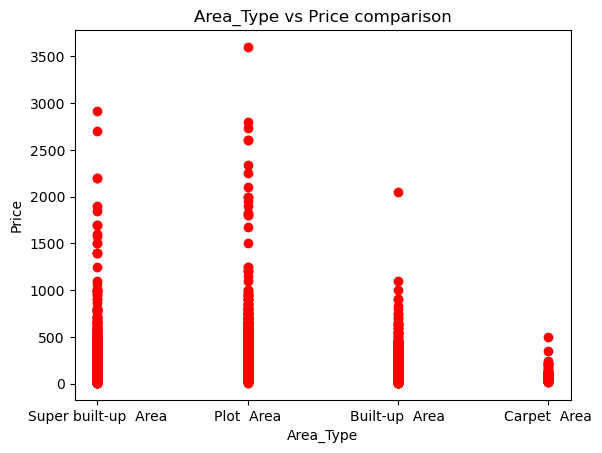

In [5]:
plt.title("Area_Type vs Price comparison")
plt.scatter(estate.area_type,estate.price,color='red',marker='o')
plt.xlabel("Area_Type")
plt.ylabel("Price")
plt.show()

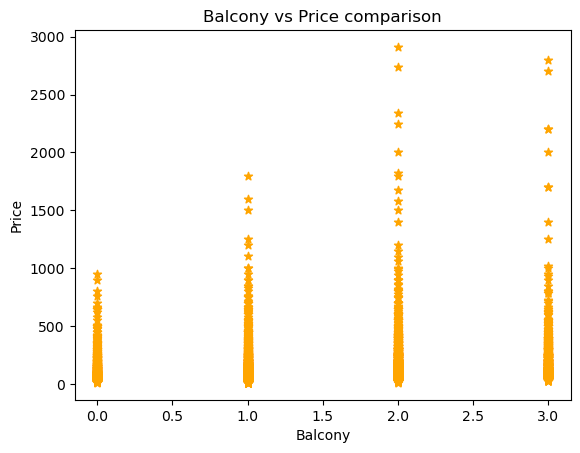

In [6]:
plt.title("Balcony vs Price comparison")
plt.scatter(estate.balcony,estate.price,color='orange',marker='*')
plt.xlabel("Balcony")
plt.ylabel("Price")
plt.show()

#### Looking at the above two scatter plots we can clearly see a linear regression

In [7]:
new_estate = estate.drop(['availability','society'],axis='columns')  # remove these 2 columns as they are not required for prediction
new_estate.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Alandi Road,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ambegaon Budruk,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Anandnagar,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Aundh,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Aundh Road,2 BHK,1200,2.0,1.0,51.00


In [8]:
new_estate.isnull().sum()  # returns the sum of null columns for each column

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [9]:
median = new_estate['bath'].median()  # calculates the median for the balcony column
new_estate['bath'] = new_estate['bath'].fillna(median)  # fills the null values with the median value
new_estate.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Alandi Road,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ambegaon Budruk,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Anandnagar,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Aundh,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Aundh Road,2 BHK,1200,2.0,1.0,51.00


In [10]:
median = new_estate['balcony'].median()  # calculates the median for the balcony column
new_estate['balcony'] = new_estate['balcony'].fillna(median)  # fills the null values with the median value
new_estate.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Alandi Road,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ambegaon Budruk,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Anandnagar,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Aundh,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Aundh Road,2 BHK,1200,2.0,1.0,51.00


In [11]:
new_estate = new_estate.dropna()  # since the other columns do not have much null values we can safely drop those rows
new_estate.shape

(13303, 7)

In [12]:
new_estate.isnull().sum()  # now there are no null values for any column

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [13]:
new_estate['size'].unique()  # here we can clearly see that 4 bedroom and 4 BHK mean the same 
# so we can remove the words Bedroom and BHK for easy understanding

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
# we use anonymous function to split the words and return the first index
new_estate.loc[:,'size'] = new_estate['size'].apply(lambda x : x.split(' ')[0])  
new_estate['size'].unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [15]:
new_estate['total_sqft'].dtype
# Here the data type is object which indicates that there is combination of strings and numeric values

dtype('O')

In [16]:
new_estate['total_sqft'].unique() 
# here we see a range of values which becomes difficult to understand and so we can take average of those numbers for better understanding

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
filtered_rows = new_estate[new_estate['total_sqft'].str.endswith(('Meter','Yards','Perch','Acres','Guntha','Cents','Grounds'))]
filtered_rows.shape # here we get 46  values which have different unit than square feet so we convert them

(46, 7)

In [18]:
import re  # regex library

In [19]:
# function to split the number and unit
def split_num_and_unit(x):   
    if isinstance(x, str):  # if the value is string then only move ahead
        numbers = re.search(r'\d+(\.\d+)?', x)
        if numbers:
            return numbers.group()
    return None

In [20]:
def convert_unit_to_sqft(x):   
    if isinstance(x, str):
        val = split_num_and_unit(x)  # calls the above function
        if val:
            if x.endswith('Meter'):
                val = float(val) * 10.764  # converts square meter to square feet
            elif x.endswith('Yards'):
                val = float(val) * 9   # converts square yards to square feet
            elif x.endswith('Perch'):
                val = float(val) * 272.25   # converts perch to square feet
            elif x.endswith('Acres'):
                val = float(val) * 43560   # converts acres to square feet
            elif x.endswith('Guntha'):
                val = float(val) * 1089   # converts guntha to square feet
            elif x.endswith('Cents'):
                val = float(val) * 435.6    # converts cents to square feet
            elif x.endswith('Grounds'):
                val = float(val) * 2400   # converts grounds to square feet
            else:
                val = convert_sqft_to_num(x)
        else:
            val = None
    else:
        val = convert_sqft_to_num(x)
    return val

In [21]:
def convert_sqft_to_num(x):
    if isinstance(x, str):
        token = x.split('-')  # splits the range of numbers by - thus getting 2 numbers
        if len(token) == 2:
            return (float(token[0]) + float(token[1])) / 2  # sums the two numbers and gets their average
        try:
            return float(x)
        except ValueError:
            return None
    return x

In [22]:
new_estate.loc[:,'total_sqft'] = new_estate['total_sqft'].apply(lambda x : convert_unit_to_sqft(x))

In [23]:
len(new_estate['area_type'].unique())  # returns the length of unique values for area_type column

4

#### Now after cleaning the data, let's try to find some outliers

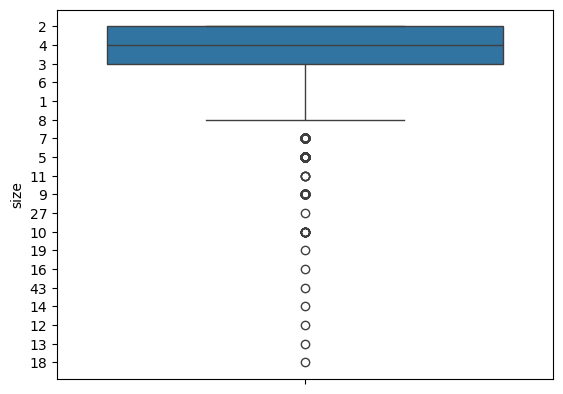

In [24]:
import seaborn as sns
from scipy import stats
sns.boxplot(new_estate['size'])
plt.show()

# We can clearly see outliers 

In [25]:
# Remove outlier using inter-quartile range method
new_estate['size'] = new_estate['size'].astype(int)
q1 = new_estate['size'].quantile(0.25)
q3 = new_estate['size'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
new_estate = new_estate[(new_estate['size']>lower_limit) & (new_estate['size']<upper_limit)]
new_estate.shape

(12457, 7)

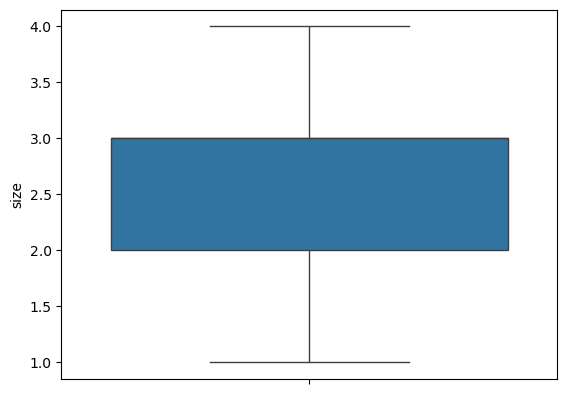

In [26]:
sns.boxplot(new_estate['size'])
plt.show()

# Outliers removed

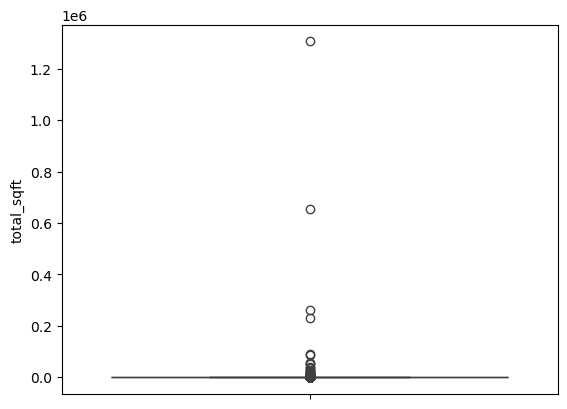

In [27]:
sns.boxplot(new_estate['total_sqft'])
plt.show()

# We can clearly see outliers 

In [28]:
# Remove outlier using percentile method
min_percentile = new_estate['total_sqft'].quantile(0.01)
max_percentile = new_estate['total_sqft'].quantile(0.99)
new_estate = new_estate[(new_estate['total_sqft']>=min_percentile) & (new_estate['total_sqft']<=max_percentile)]
new_estate.shape

(12227, 7)

In [29]:
# Remove outlier using inter-quartile range method
new_estate['total_sqft'] = new_estate['total_sqft'].astype(int)
q1 = new_estate['total_sqft'].quantile(0.25)
q3 = new_estate['total_sqft'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
new_estate = new_estate[(new_estate['total_sqft']>lower_limit) & (new_estate['total_sqft']<upper_limit)]
new_estate.shape

(11287, 7)

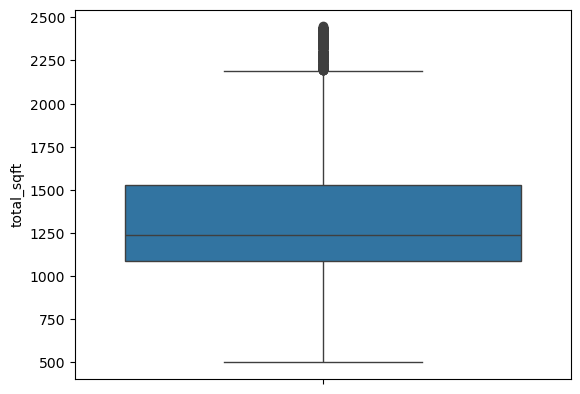

In [30]:
sns.boxplot(new_estate['total_sqft'])
plt.show()

# Outliers removed to some extent

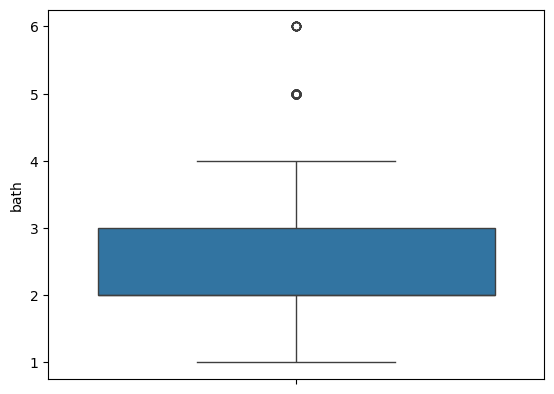

In [31]:
sns.boxplot(new_estate['bath'])
plt.show()

# We can clearly see outliers 

In [32]:
# Remove outlier using inter-quartile range method
new_estate['bath'] = new_estate['bath'].astype(int)
q1 = new_estate['bath'].quantile(0.25)
q3 = new_estate['bath'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
new_estate = new_estate[(new_estate['bath']>lower_limit) & (new_estate['bath']<upper_limit)]
new_estate.shape

(11196, 7)

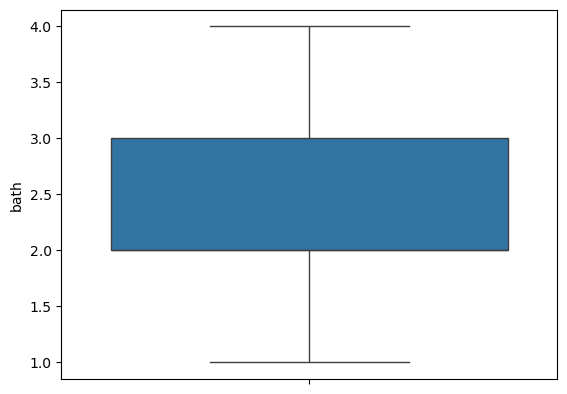

In [33]:
sns.boxplot(new_estate['bath'])
plt.show()

# Outliers removed

In [34]:
new_estate['price_per_sqft'] = (new_estate['price'] * 100000) / new_estate['total_sqft']
new_estate.head()

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,Alandi Road,2,1056,2,1.0,39.07,3699.810606
2,Built-up Area,Anandnagar,3,1440,2,3.0,62.00,4305.555556
3,Super built-up Area,Aundh,3,1521,3,1.0,95.00,6245.890861
4,Super built-up Area,Aundh Road,2,1200,2,1.0,51.00,4250.000000
5,Super built-up Area,Balaji Nagar,2,1170,2,1.0,38.00,3247.863248


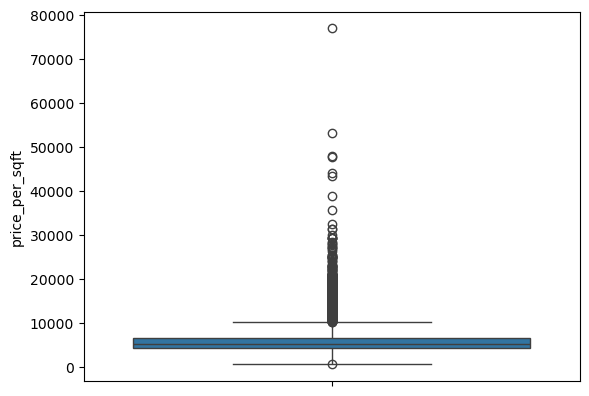

In [35]:
sns.boxplot(new_estate['price_per_sqft'])
plt.show()

# We can clearly see outliers 

In [36]:
# Remove outlier using percentile method
min_percentile = new_estate['price_per_sqft'].quantile(0.01)
max_percentile = new_estate['price_per_sqft'].quantile(0.99)
new_estate = new_estate[(new_estate['price_per_sqft']>=min_percentile) & (new_estate['price_per_sqft']<=max_percentile)]
new_estate.shape

(10973, 8)

In [37]:
# Remove outlier using inter-quartile range method
new_estate['price_per_sqft'] = new_estate['price_per_sqft'].astype(int)
q1 = new_estate['price_per_sqft'].quantile(0.25)
q3 = new_estate['price_per_sqft'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
new_estate = new_estate[(new_estate['price_per_sqft']>lower_limit) & (new_estate['price_per_sqft']<upper_limit)]
new_estate.shape

(10250, 8)

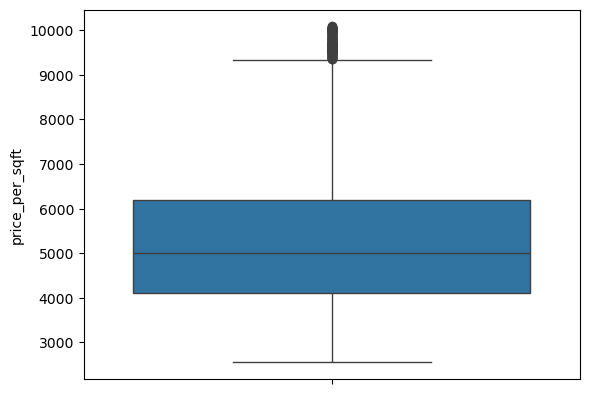

In [38]:
sns.boxplot(new_estate['price_per_sqft'])
plt.show()

# Outliers removed to some extent

In [39]:
new_estate['bedroom_price_per_sqft'] = (new_estate['total_sqft'] / new_estate['size'])
new_estate.head()

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft,bedroom_price_per_sqft
0,Super built-up Area,Alandi Road,2,1056,2,1.0,39.07,3699,528.0
2,Built-up Area,Anandnagar,3,1440,2,3.0,62.00,4305,480.0
3,Super built-up Area,Aundh,3,1521,3,1.0,95.00,6245,507.0
4,Super built-up Area,Aundh Road,2,1200,2,1.0,51.00,4250,600.0
5,Super built-up Area,Balaji Nagar,2,1170,2,1.0,38.00,3247,585.0


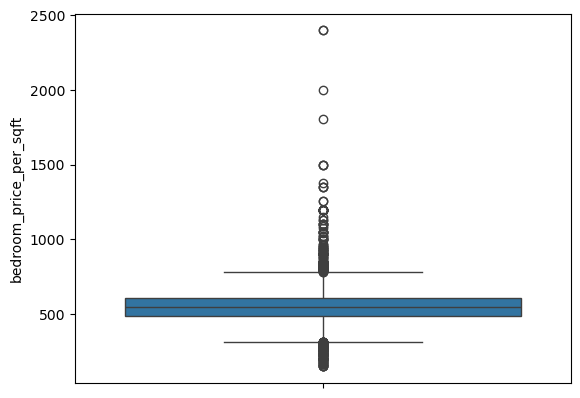

In [40]:
sns.boxplot(new_estate['bedroom_price_per_sqft'])
plt.show()

# We can clearly see outliers 

In [41]:
# Remove outlier using percentile method
min_percentile = new_estate['bedroom_price_per_sqft'].quantile(0.01)
max_percentile = new_estate['bedroom_price_per_sqft'].quantile(0.99)
new_estate = new_estate[(new_estate['bedroom_price_per_sqft']>=min_percentile) & (new_estate['bedroom_price_per_sqft']<=max_percentile)]
new_estate.shape

(10054, 9)

In [42]:
# Remove outlier using inter-quartile range method
new_estate['bedroom_price_per_sqft'] = new_estate['bedroom_price_per_sqft'].astype(int)
q1 = new_estate['bedroom_price_per_sqft'].quantile(0.25)
q3 = new_estate['bedroom_price_per_sqft'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
new_estate = new_estate[(new_estate['bedroom_price_per_sqft']>lower_limit) & (new_estate['bedroom_price_per_sqft']<upper_limit)]
new_estate.shape

(9841, 9)

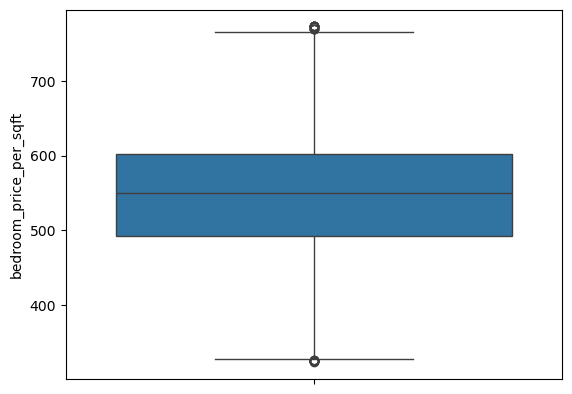

In [43]:
sns.boxplot(new_estate['bedroom_price_per_sqft'])
plt.show()

# Outliers removed to some extent

In [44]:
new_estate['bath_price_per_sqft'] = (new_estate['total_sqft'] / new_estate['bath'])
new_estate.head()

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft,bedroom_price_per_sqft,bath_price_per_sqft
0,Super built-up Area,Alandi Road,2,1056,2,1.0,39.07,3699,528,528.0
2,Built-up Area,Anandnagar,3,1440,2,3.0,62.00,4305,480,720.0
3,Super built-up Area,Aundh,3,1521,3,1.0,95.00,6245,507,507.0
4,Super built-up Area,Aundh Road,2,1200,2,1.0,51.00,4250,600,600.0
5,Super built-up Area,Balaji Nagar,2,1170,2,1.0,38.00,3247,585,585.0


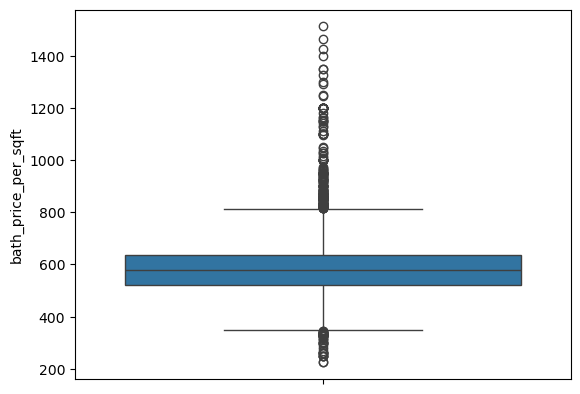

In [45]:
sns.boxplot(new_estate['bath_price_per_sqft'])
plt.show()

# We can clearly see outliers 

In [46]:
# Remove outlier using percentile method
min_percentile = new_estate['bath_price_per_sqft'].quantile(0.01)
max_percentile = new_estate['bath_price_per_sqft'].quantile(0.99)
new_estate = new_estate[(new_estate['bath_price_per_sqft']>=min_percentile) & (new_estate['bath_price_per_sqft']<=max_percentile)]
new_estate.shape

(9651, 10)

In [47]:
# Remove outlier using inter-quartile range method
new_estate['bath_price_per_sqft'] = new_estate['bath_price_per_sqft'].astype(int)
q1 = new_estate['bath_price_per_sqft'].quantile(0.25)
q3 = new_estate['bath_price_per_sqft'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
new_estate = new_estate[(new_estate['bath_price_per_sqft']>lower_limit) & (new_estate['bath_price_per_sqft']<upper_limit)]
new_estate.shape

(9538, 10)

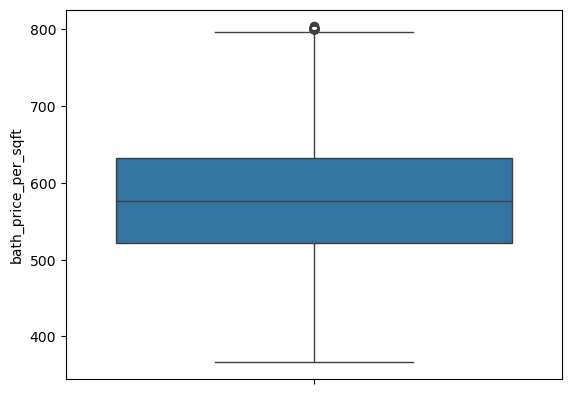

In [48]:
sns.boxplot(new_estate['bath_price_per_sqft'])
plt.show()

# Outliers removed to some extent

In [49]:
new_estate.loc[:,'balcony_price_per_sqft'] = (new_estate['total_sqft'] / new_estate['balcony'])
new_estate.head()

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft,bedroom_price_per_sqft,bath_price_per_sqft,balcony_price_per_sqft
0,Super built-up Area,Alandi Road,2,1056,2,1.0,39.07,3699,528,528,1056.0
2,Built-up Area,Anandnagar,3,1440,2,3.0,62.00,4305,480,720,480.0
3,Super built-up Area,Aundh,3,1521,3,1.0,95.00,6245,507,507,1521.0
4,Super built-up Area,Aundh Road,2,1200,2,1.0,51.00,4250,600,600,1200.0
5,Super built-up Area,Balaji Nagar,2,1170,2,1.0,38.00,3247,585,585,1170.0


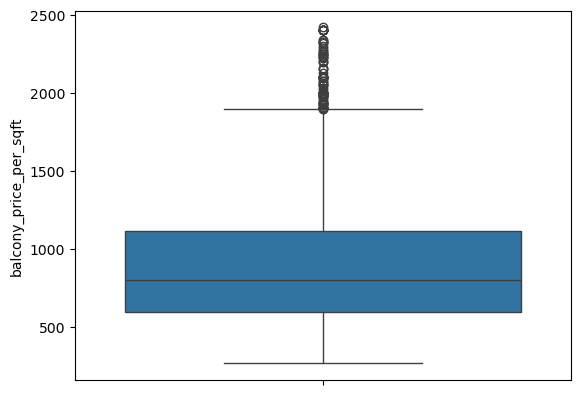

In [50]:
sns.boxplot(new_estate['balcony_price_per_sqft'])
plt.show()

# We can clearly see outliers 

In [51]:
# Remove outlier using inter-quartile range method
q1 = new_estate['balcony_price_per_sqft'].quantile(0.25)
q3 = new_estate['balcony_price_per_sqft'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
new_estate = new_estate[(new_estate['balcony_price_per_sqft']>lower_limit) & (new_estate['balcony_price_per_sqft']<upper_limit)]
new_estate.shape

(8951, 11)

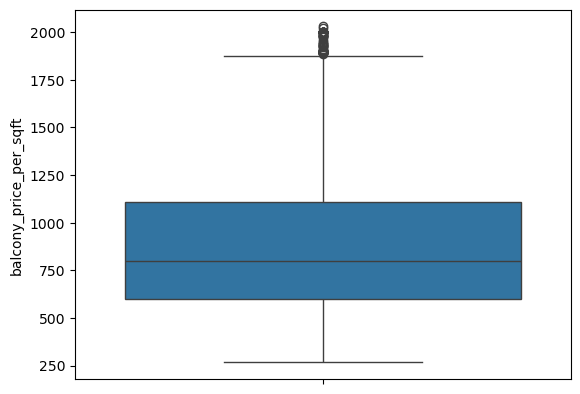

In [52]:
sns.boxplot(new_estate['balcony_price_per_sqft'])
plt.show()

# Outliers removed to some extent

#### Now let's build the model

In [53]:
dummies = pd.get_dummies(new_estate['area_type']).astype(int)
new_estate = pd.concat([new_estate,dummies],axis='columns')
new_estate.head()

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft,bedroom_price_per_sqft,bath_price_per_sqft,balcony_price_per_sqft,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,Super built-up Area,Alandi Road,2,1056,2,1.0,39.07,3699,528,528,1056.0,0,0,0,1
2,Built-up Area,Anandnagar,3,1440,2,3.0,62.00,4305,480,720,480.0,1,0,0,0
3,Super built-up Area,Aundh,3,1521,3,1.0,95.00,6245,507,507,1521.0,0,0,0,1
4,Super built-up Area,Aundh Road,2,1200,2,1.0,51.00,4250,600,600,1200.0,0,0,0,1
5,Super built-up Area,Balaji Nagar,2,1170,2,1.0,38.00,3247,585,585,1170.0,0,0,0,1


In [54]:
dummies = pd.get_dummies(new_estate['location']).astype(int)
new_estate = pd.concat([new_estate,dummies],axis='columns')
new_estate.head()

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft,bedroom_price_per_sqft,bath_price_per_sqft,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
0,Super built-up Area,Alandi Road,2,1056,2,1.0,39.07,3699,528,528,...,0,0,0,0,0,0,0,0,0,0
2,Built-up Area,Anandnagar,3,1440,2,3.0,62.00,4305,480,720,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,Aundh,3,1521,3,1.0,95.00,6245,507,507,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,Aundh Road,2,1200,2,1.0,51.00,4250,600,600,...,0,0,0,0,0,0,0,0,0,0
5,Super built-up Area,Balaji Nagar,2,1170,2,1.0,38.00,3247,585,585,...,0,0,0,0,0,0,0,0,0,0


In [55]:
X = new_estate.drop(['other','location','area_type','price','price_per_sqft','bedroom_price_per_sqft','bath_price_per_sqft','balcony_price_per_sqft'],axis='columns')
X.head()

,size,total_sqft,bath,balcony,Built-up Area,Carpet Area,Plot Area,Super built-up Area,Alandi Road,Ambegaon Budruk,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,2,1056,2,1.0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1440,2,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1521,3,1.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1200,2,1.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,1170,2,1.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
X.columns = X.columns.str.replace('  ',' ')  # replace two spaces with 1 space for columns
X.head()

,size,total_sqft,bath,balcony,Built-up Area,Carpet Area,Plot Area,Super built-up Area,Alandi Road,Ambegaon Budruk,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,2,1056,2,1.0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1440,2,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1521,3,1.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1200,2,1.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,1170,2,1.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
Y = new_estate['price']
Y.head()

0    39.07
2    62.00
3    95.00
4    51.00
5    38.00
Name: price, dtype: float64

In [58]:
# Split the dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [59]:
len(X_train)

7160

In [60]:
len(X_test)

1791

In [61]:
len(Y_train)

7160

In [62]:
len(Y_test)

1791

In [63]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=1)
model.fit(X_train.values,Y_train)
model

LinearRegression(n_jobs=1)

In [64]:
model.score(X_train.values,Y_train)

0.6505033300451364

In [65]:
model.score(X_test.values,Y_test)

0.6629300873247012

In [66]:
def predict_price(location,area_type,size,total_sqft,bath,balcony):  # function to predict price
    loc_index = np.where(X.columns == location)[0][0]  # returs the index of the location entered
    loc_index1 = np.where(X.columns == area_type)[0][0]
    x = np.zeros(len(X.columns))
    # x[0] = area_type
    x[0] = size
    x[1] = total_sqft
    x[2] = bath
    x[3] = balcony
    if loc_index>=0:
        x[loc_index] = 1
    if loc_index1>=0:
        x[loc_index1] = 1
    return model.predict([x])[0]

In [67]:
predict_price('Anandnagar','Built-up Area',3,1440,2,3)  

68.84321594238281

In [68]:
predict_price('Camp','Super built-up Area',3,1800,3,3)

108.31391906738281

In [69]:
import pickle  # saves the model
with open('pune_house_data_model_pickle','wb') as f:   # using pickle module we dump the model into a file using write binary mode (wb)
    pickle.dump(model,f)

In [70]:
import json   # saves the column names in json which we will require later
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    json.dump(columns,f)